# Imports

In [2]:
import pandas as pd
import numpy as np
import madmom as mm
import librosa as lr
import librosa.display as display
import IPython.display as ipd
import matplotlib.pyplot as plt

# Constants

In [5]:
DATAPOINT = "Sample Datapoints/Testing/MAPS_RAND_P2_M21-108_I32-96_S0_n12_SptkBGAm.wav"

# Wrangle Data
(load datapoint)

In [6]:
timeSeries, sampleRate = lr.load(DATAPOINT)

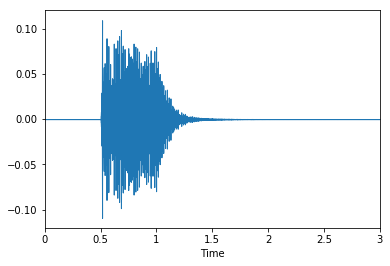

In [7]:
display.waveplot(timeSeries, sr=sampleRate)

In [8]:
ipd.Audio(timeSeries, rate=sampleRate)

# Spectrogramify

### CQT Form

In [42]:
cqtSpect = lr.cqt(timeSeries,
                  fmin=lr.midi_to_hz(21),
                  sr=sampleRate,
                  hop_length=512,
                  bins_per_octave=24,
                  n_bins=24 * 8)
                 

In [34]:
lr.midi_to_hz(21), lr.midi_to_hz(21 + 12 * 8)

(27.5, 7040.0)

/usr/local/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


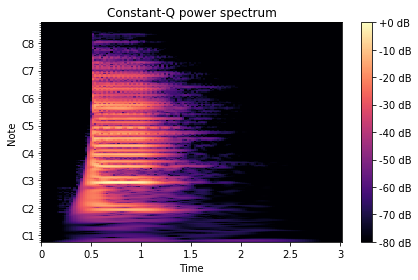

In [43]:
lr.display.specshow(lr.amplitude_to_db(cqtSpect, ref=np.max), \
                    sr=sampleRate, x_axis='time', y_axis='cqt_note', fmin=lr.midi_to_hz(21), bins_per_octave=24)
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()

In [22]:
lr.display.specshow?

/usr/local/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


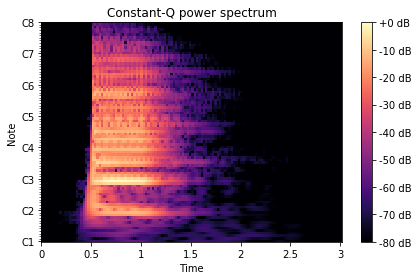

In [11]:
y, sr = lr.load(DATAPOINT)
C = lr.cqt(y, sr=sr)
lr.display.specshow(lr.amplitude_to_db(C, ref=np.max), \
                    sr=sampleRate, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()

### STFT + Triangular Filterbank form

In [ ]:
stftSpect = mm.audio.stft.stft(timeSeries, )